In [5]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [6]:
#tacke leveslike
L1=[816,111,1]
L2=[950,164,1]
L3=[987,125,1]
L4=[854,79,1]
L5=[790,303,1]
L6=[911,358,1]
L7=[952,317,1]
#L8=[0,0,1] # nevidljiva tacka
L9=[321,345,1]
L10=[452,369,1]
L11=[511,271,1]
L12=[387,249,1]
L13=[364,559,1]
L14=[477,582,1]
L15=[526,487,1]
#L16=[0,0,1]
L17=[137,549,1]
L18=[435,761,1]
L19=[815,382,1]
L20=[547,252,1]
L21=[175,656,1]
L22=[449,860,1]
L23=[806,488,1]
#L24=[0,0,1]


#desna slika
R1=[910,444,1]
R2=[810,561,1]
R3=[917,613,1]
R4=[1012,492,1]
#R5=[0,0,1] #nevidljiva
R6=[773,771,1]
R7=[864,824,1]
R8=[956,700,1]
R9=[298,71,1]
R10=[251,119,1]
R11=[370,139,1]
R12=[413,89,1]
#R13=[0,0,1]
R14=[288,326,1]
R15=[395,343,1]
R16=[431,287,1]
#R17=[0,0,1]
R18=[137,319,1]
R19=[525,531,1]
R20=[742,347,1]
#R21=[0,0,1]
R22=[160,425,1]
R23=[529,645,1]
R24=[735,453,1]




In [7]:
#8 tacaka na osnovu kojih pravimo fundamentalnu matricu FF
LL=np.array([L1,L2,L3,L4,L6,L7,L9,L10])
RR=np.array([R1,R2,R3,R4,R6,R7,R9,R10])

In [9]:
def jednacina(l,r):
    a1=l[0]
    a2=l[0]
    a3=l[0]

    b1=r[0]
    b2=r[0]
    b3=r[0]

    return np.matrix([[a1*b1,a2*b1,a3*b1,
                      a1*b2,a2*b2,a3*b2,
                      a1*b3,a2*b3,a3*b3]])



# matrica 8x9 
# matrica 8x9 koja predstavlja 8 jednacina dobijenih iz korespodencija:
matrica8 = jednacina(LL[0], RR[0])
n = len(LL)
for i in range(1, n):
    tmp = jednacina(LL[i], RR[i])
    matrica8 = np.concatenate((matrica8, tmp), axis=0)    


In [10]:
# svd dekompozicija matrice:
U, D, Vt = la.svd(matrica8)

# F je poslednja kolona V:
F = Vt[-1].reshape(3, 3)
print("Fundamentalna matrica F:\n", F)
    

Fundamentalna matrica F:
 [[-0.33333333 -0.08333333 -0.08333333]
 [-0.08333333 -0.08333333 -0.08333333]
 [-0.08333333 -0.08333333  0.91666667]]


In [12]:
# provera uslova za svih 8 tacaka:

def proveri(l, r):
    pom = np.dot(np.dot(r, F), l)
    return pom[0, 0]

# proveramo uslov za 8 izabranih tacaka:
c = []
for i in range(len(LL)):
    element = proveri(LL[i], RR[i])
    c.append(element)

print("Provera:\n", c)
print()
print("det(FF):\n", la.det(F))   
    

Provera:
 [-290425.6666666666, -319855.6666666666, -368268.99999999994, -333200.1666666667, -339562.24999999994, -384383.49999999994, -44479.333333333336, -53775.49999999999]

det(FF):
 0.02083333333333334


In [13]:
U,D,Vt=la.svd(F)
    #F*e1=0
    # print("U:\n",U)
    # print("D:\n",D)
    # print("Vt\n:",Vt)
print("################# EPIPOLOVI ###############")

print("e1:")
e1=Vt[-1]
print(e1)
e1=e1/e1[0,2] #afinee
print("Afine:\n",e1)
    
    #FT *e2=0
print("e2:")
e2=U.T[-1]
    #treca kolona tj treca vrsta od U.T
print(e2)
e2=e2/e2[0,2] #afinee
#afinee
print("Afine:\n",e2)

################# EPIPOLOVI ###############
e1:
[[ 0.30760112 -0.94993937 -0.05474249]]
Afine:
 [[-5.6190566  17.35287263  1.        ]]
e2:
[[-0.30760112  0.94993937  0.05474249]]
Afine:
 [[-5.6190566  17.35287263  1.        ]]


In [14]:
    #zarad postizanje uslova det(FF)=0  
Dp=np.array([[D[0],0,0],
            [0,D[1],0],
            [0,0,0]])
    #np.diag([1,1,0])*D

print("Dp:\n",Dp)

Dp:
 [[0.92819249 0.         0.        ]
 [0.         0.36704116 0.        ]
 [0.         0.         0.        ]]


In [15]:
F1=U.dot(Dp).dot(Vt)
# print(FF)
print("F1:\n",F1)

    #FF i FF1 imaju iste matrice U i Vt samim tim i iste epipolove
print("det F:\n",np.linalg.det(F))
print("det F1:\n",np.linalg.det(F1))

F1:
 [[-0.32754729 -0.1012019  -0.08436305]
 [-0.1012019  -0.0281513  -0.08015334]
 [-0.08436305 -0.08015334  0.91684992]]
det F:
 0.02083333333333334
det F1:
 2.4586315849505717e-19


In [16]:
# rekonstrukcija nevidljivih tacaka - funkcija kopirana iz prvog domaceg

def nevidljiva_tacka(A, B, C, D, A1, B1, C1):

    # paralelne ivice AA1, BB1, CC1 i DD1 seku se u P
    AA1 = np.cross(A, A1)
    BB1 = np.cross(B, B1)
    CC1 = np.cross(C, C1)
    
    P1 = np.cross(AA1, BB1)
    P2 = np.cross(AA1, CC1)
    P3 = np.cross(BB1, CC1)
    
    P = (P1 + P2 + P3) / 3
    
    # paralelne ivice BC, AD, B1C1 i A1D1 seku se u Q
    BC = np.cross(B, C)
    AD = np.cross(A, D)
    B1C1 = np.cross(B1, C1)
    
    Q1 = np.cross(BC, AD)
    Q2 = np.cross(BC, B1C1)
    Q3 = np.cross(B1C1, AD)
    
    Q = (Q1 + Q2 + Q3) / 3

    #Trazeno teme D1:
    PD = np.cross(P,D)
    A1Q = np.cross(A1,Q)
    D1 = np.cross(PD, A1Q)

    return D1 / D1[2]
     

In [18]:
L8 = nevidljiva_tacka(L1, L2, L3, L4, L5, L6, L7)
L16 = nevidljiva_tacka(L9, L10, L11, L12, L13, L14, L15)
L24 = nevidljiva_tacka(L17, L18, L19, L20, L21, L22, L23)

print("L8: ",L8)
print("L16: ", L16)
print("L24: ", L24)
print()
R5 = nevidljiva_tacka(R2, R3, R4, R1, R6, R7, R8)
R13 = nevidljiva_tacka(R10, R11, R12, R9, R14, R15, R16)

R17 = np.cross(np.cross(np.cross(np.cross(R19, R18), np.cross(R23, R22)), R20), np.cross(np.cross(np.cross(R20, R19), np.cross(R23, R24)), R18))
R17 = R17 / R17[2]
R17.round()

R21 = nevidljiva_tacka(R18, R19, R20, R17, R22, R23, R24)

print("R8: ", R8)
print("R16: ", R16)
print("R24: ", R24)

L8:  [823.51439477 272.36492329   1.        ]
L16:  [419.01247398 464.90501569   1.        ]
L24:  [552.87136898 358.55408757   1.        ]

R8:  [956, 700, 1]
R16:  [431, 287, 1]
R24:  [735, 453, 1]


In [19]:
L=np.array([L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20,L21,L22,L23,L24])
R=np.array([R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24])

In [20]:
T1=np.array([[1,0,0,0],
             [0,1,0,0],
             [0,0,1,0]])

print("T1:") #kanonska matrica kamere
print(T1)

T1:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]


In [21]:
E2 = np.matrix([[0, -e2[0, 2], e2[0, 1]], [e2[0, 2], 0, -e2[0, 0]], [-e2[0, 1], e2[0, 0], 0]])
# racunanje matrice vektorskog mnozenja sa e2:

print("E2:\n", E2)

E2:
 [[  0.          -1.          17.35287263]
 [  1.           0.           5.6190566 ]
 [-17.35287263  -5.6190566    0.        ]]


In [22]:
# T2 --matrica kamere:
T2 = np.concatenate((E2 * F1, np.transpose(e2)), axis=1)

print("E2 * F1:\n", E2 * F1)
print()
print("e2:\n", e2)
print()
print("Matrica T2:\n", T2)

E2 * F1:
 [[-1.36273939 -1.36273939 15.99013324]
 [-0.80158805 -0.55158805  5.06746855]
 [ 6.25254559  1.91432744  1.91432744]]

e2:
 [[-5.6190566  17.35287263  1.        ]]

Matrica T2:
 [[-1.36273939 -1.36273939 15.99013324 -5.6190566 ]
 [-0.80158805 -0.55158805  5.06746855 17.35287263]
 [ 6.25254559  1.91432744  1.91432744  1.        ]]


In [23]:
def jednacine(x, y):
    listajednacina = np.array([ x[1] * T1[2] - x[2] * T1[1],
                               -x[0] * T1[2] + x[2] * T1[0],
                                y[1] * T2[2] - y[2] * T2[1],
                               -y[0] * T2[2] + y[2] * T2[0]])
    return np.matrix(listajednacina)

In [24]:
def afina(x):
    x = x / x[3]
    return x[:-1]

In [27]:
def triD(x, y):
    mat = np.transpose(la.svd(jednacine(x, y))[2][3])
    p = np.array(mat)
    return afine(p)




In [34]:
rekonstruisane = []
n = len(L)
for i in range(n):
    tmp = triD(L[i], R[i])
    rekonstruisane.append(tmp)
    print(f"rekonstrukcija {i}:\n{tmp}\n")

<ipython-input-23-d5cca6cba086>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  listajednacina = np.array([ x[1] * T1[2] - x[2] * T1[1],


TypeError: No loop matching the specified signature and casting was found for ufunc svd_m_f

In [35]:
tmp=np.eye(3) #dijagonalna
tmp[2][2]=400    
rek400=np.zeros((len(L),3))
#zbog z radimo prepravku koordinata
for i in range(len(L)):   
    rek400[i]=tmp.dot(rekonstruisane[i][:,0])
    print(rek400[i])

IndexError: list index out of range

<IPython.core.display.Javascript object>


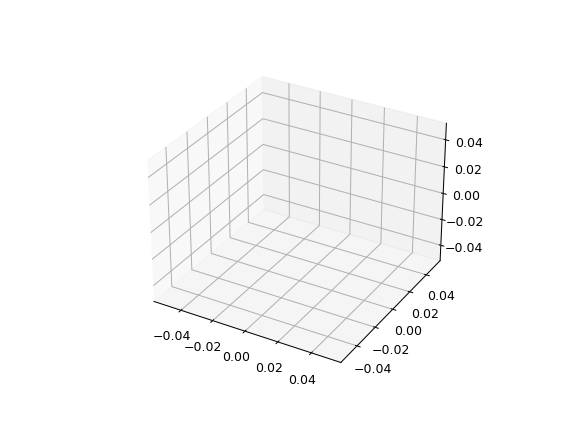

In [36]:
keks=np.array([[1,2],[2,3],[3,4],[4,1],
               [5,6],[6,7],[7,8],[8,5],
               [1,5],[2,6],[3,7],[4,8]])

caj=np.array([[9,10],[10,11],[11,12],[12,9],
              [13,14],[14,15],[15,16],[16,13],
              [9,13],[10,14],[11,15],[12,16]])

modem=np.array([[17,18],[18,19],[19,20],[20,17],
                [21,22],[22,23],[23,24],[24,21],
                [17,21],[18,22],[19,23],[20,24]])

    
fig = plt.figure()
ax = plt.axes(projection='3d')

for ivica in modem:
    ax.plot3D([rek400[ivica[0] - 1][0],rek400[ivica[1] - 1][0]], [rek400[ivica[0] - 1][1], rek400[ivica[1] - 1][1]], [rek400[ivica[0] - 1][2], rek400[ivica[1] - 1][2]], 'red')

for ivica in caj:
    ax.plot3D([rek400[ivica[0] - 1][0],rek400[ivica[1] - 1][0]], [rek400[ivica[0] - 1][1], rek400[ivica[1] - 1][1]], [rek400[ivica[0] - 1][2], rek400[ivica[1] - 1][2]], 'blue')

for ivica in keks:
    ax.plot3D([rek400[ivica[0] - 1][0],rek400[ivica[1] - 1][0]], [rek400[ivica[0] - 1][1], rek400[ivica[1] - 1][1]], [rek400[ivica[0] - 1][2], rek400[ivica[1] - 1][2]], 'green')
